# Лабораторная работа №3,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Яссин Мохамад Аламин**.
- Ноиер студ. билета: **1032205004**.
- Группа: **НКНбд-01-20**.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, RegularPolygon
import numpy as np

## №1

oy
     \begin{bmatrix}
     \cos(\theta) & 0 & \sin(\theta) & 0 \\
     0 & 1 & 0 & 0 \\
     -\sin(\theta) & 0 & \cos(\theta) & 0 \\
     0 & 0 & 0 & 1
     \end{bmatrix}
     
ox
\begin{bmatrix}
     1 & 0 & 0 & 0 \\
     0 & \cos(\theta) & -\sin(\theta) & 0 \\
     0 & \sin(\theta) & \cos(\theta) & 0 \\
     0 & 0 & 0 & 1
     \end{bmatrix}

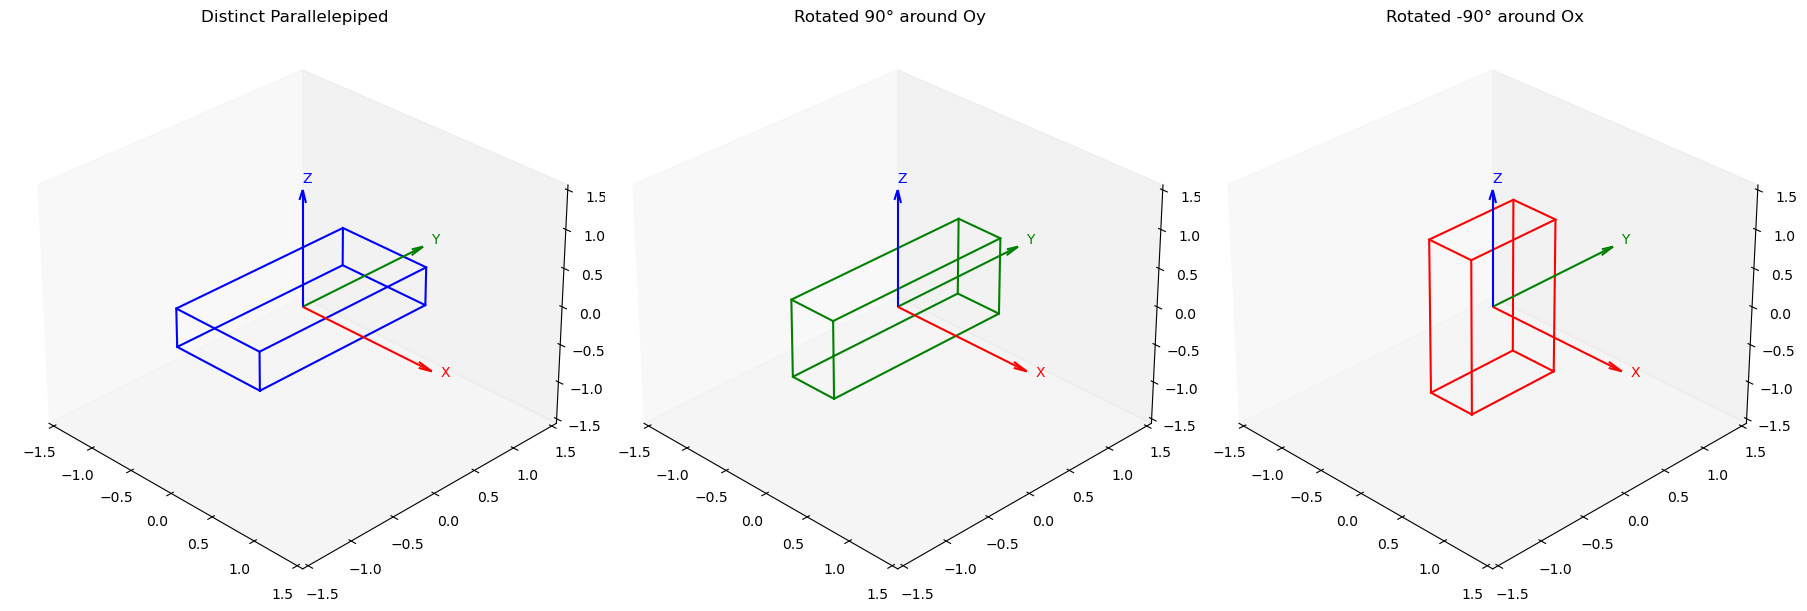

In [2]:
def plot_axes(ax, length=1.5):
    """Plot 3D axes on the given ax."""
    # X axis (red)
    ax.quiver(0, 0, 0, length, 0, 0, color='red', arrow_length_ratio=0.1)
    ax.text(length + 0.1, 0, 0, 'X', color='red')

    # Y axis (green)
    ax.quiver(0, 0, 0, 0, length, 0, color='green', arrow_length_ratio=0.1)
    ax.text(0, length + 0.1, 0, 'Y', color='green')

    # Z axis (blue)
    ax.quiver(0, 0, 0, 0, 0, length, color='blue', arrow_length_ratio=0.1)
    ax.text(0, 0, length + 0.1, 'Z', color='blue')
theta_y = np.radians(90)
theta_x = np.radians(-90)
# Rotation matrix around Oy axis in homogeneous coordinates
def homogeneous_rotation_matrix_around_y(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [c, 0, s, 0],
        [0, 1, 0, 0],
        [-s, 0, c, 0],
        [0, 0, 0, 1]
    ])

# Rotation matrix around Ox axis in homogeneous coordinates
def homogeneous_rotation_matrix_around_x(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([
        [1, 0, 0, 0],
        [0, c, -s, 0],
        [0, s, c, 0],
        [0, 0, 0, 1]
    ])

    # Function to plot a parallelepiped given its vertices ##connect edges
def plot_parallelepiped(vertices, ax, color='blue'):
    edges = [
        [vertices[j] for j in [0, 1, 3, 2, 0, 4, 5, 7, 6, 4]], # bottom and top
        [vertices[j] for j in [5, 1]], # vertical edges
        [vertices[j] for j in [7, 3]],
        [vertices[j] for j in [6, 2]]
    ]
    for edge in edges:
        edge = np.array(edge)
        ax.plot(edge[:, 0], edge[:, 1], edge[:, 2], color=color)

# Modify the original vertices to form a distinct parallelepiped shape.
# Dimensions: 1x2x0.5, centered at the origin.
vertices_distinct = np.array([
    [-0.5, -1, -0.25, 1],  # A
    [-0.5, -1, 0.25, 1],   # B
    [-0.5, 1, -0.25, 1],   # C
    [-0.5, 1, 0.25, 1],    # D
    [0.5, -1, -0.25, 1],   # E
    [0.5, -1, 0.25, 1],    # F
    [0.5, 1, -0.25, 1],    # G
    [0.5, 1, 0.25, 1]      # H
])

# Apply the rotations to the distinct parallelepiped
vertices_rotated_y_distinct = vertices_distinct.dot(homogeneous_rotation_matrix_around_y(theta_y))
vertices_rotated_x_distinct = vertices_rotated_y_distinct.dot(homogeneous_rotation_matrix_around_x(theta_x))

# Removing the homogeneous coordinate for plotting
vertices_distinct = vertices_distinct[:, :3]
vertices_rotated_y_distinct = vertices_rotated_y_distinct[:, :3]
vertices_rotated_x_distinct = vertices_rotated_x_distinct[:, :3]

# Visualization with the new shape
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

plot_parallelepiped(vertices_distinct, ax1)
ax1.set_title('Distinct Parallelepiped')
plot_axes(ax1)

plot_parallelepiped(vertices_rotated_y_distinct, ax2, color='green')
ax2.set_title('Rotated 90° around Oy')
plot_axes(ax2)

plot_parallelepiped(vertices_rotated_x_distinct, ax3, color='red')
ax3.set_title('Rotated -90° around Ox')
plot_axes(ax3)

for ax in [ax1, ax2, ax3]:
    ax.view_init(30, -45)
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_zlim([-1.5, 1.5])
    ax.grid(False)

plt.tight_layout()
plt.show()

## № 2

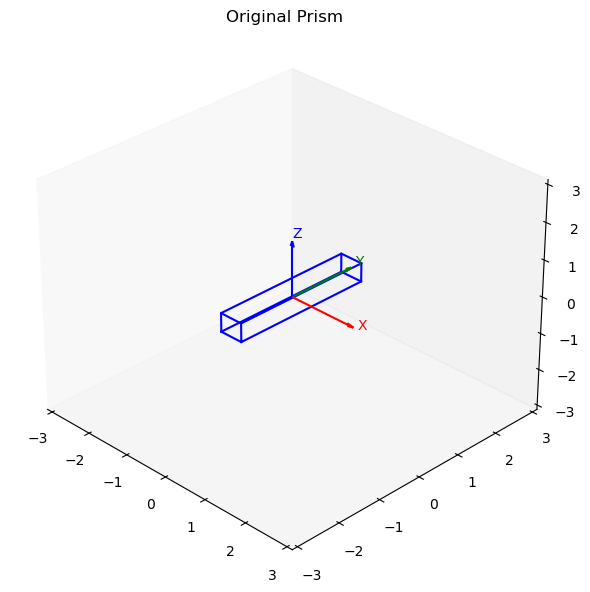

In [3]:
# Vertex coordinates for the prism from the table
vertices_distinct_prism = np.array([
    [-0.25, -1.5, -0.25, 1],  # A
    [-0.25, -1.5, 0.25, 1],   # B
    [-0.25, 1.5, -0.25, 1],   # C
    [-0.25, 1.5, 0.25, 1],    # D
    [0.25, -1.5, -0.25, 1],   # E
    [0.25, -1.5, 0.25, 1],    # F
    [0.25, 1.5, -0.25, 1],    # G
    [0.25, 1.5, 0.25, 1]      # H
])

# Visualization of the original prism
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

plot_parallelepiped(vertices_distinct_prism, ax)
ax.set_title('Original Prism')
plot_axes(ax)

ax.view_init(30, -45)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.grid(False)

plt.tight_layout()
plt.show()


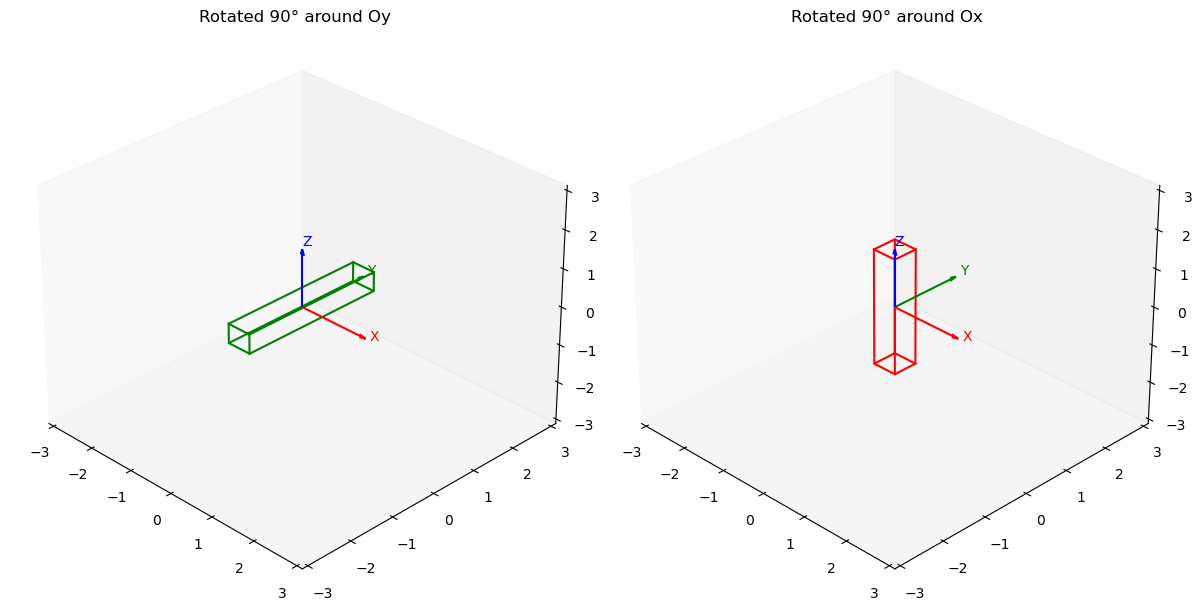

In [4]:
# Since vertices_distinct_prism already has homogeneous coordinates, we don't need to add another column of ones.
# Thus, vertices_prism_original_homogeneous is the same as vertices_distinct_prism.
vertices_prism_original_homogeneous = vertices_distinct_prism

# Rotating the original prism +90° around Oy axis
vertices_rotated_y_prism = vertices_prism_original_homogeneous.dot(homogeneous_rotation_matrix_around_y(np.radians(90)))
vertices_rotated_y_prism = vertices_rotated_y_prism[:, :3]

# Rotating the prism +90° around Ox axis
vertices_rotated_x_prism = vertices_prism_original_homogeneous.dot(homogeneous_rotation_matrix_around_x(np.radians(90)))
vertices_rotated_x_prism = vertices_rotated_x_prism[:, :3]

# Visualization of the rotated prisms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

plot_parallelepiped(vertices_rotated_y_prism, ax1, color='green')
ax1.set_title('Rotated 90° around Oy')
plot_axes(ax1)

plot_parallelepiped(vertices_rotated_x_prism, ax2, color='red')
ax2.set_title('Rotated 90° around Ox')
plot_axes(ax2)

for ax in [ax1, ax2]:
    ax.view_init(30, -45)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.grid(False)

plt.tight_layout()
plt.show()

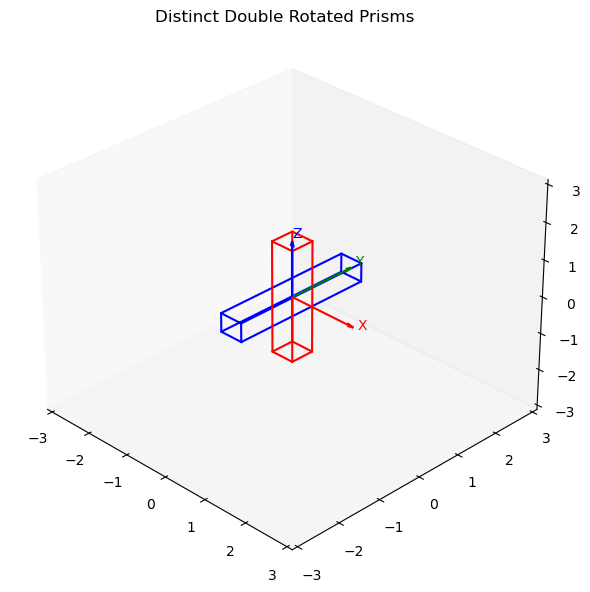

In [5]:
# Modify the original vertices to form a distinct prism shape.
# Dimensions: 0.5x3x0.5, centered at the origin.
vertices_distinct_prism = np.array([
    [-0.25, -1.5, -0.25, 1],  # A
    [-0.25, -1.5, 0.25, 1],   # B
    [-0.25, 1.5, -0.25, 1],   # C
    [-0.25, 1.5, 0.25, 1],    # D
    [0.25, -1.5, -0.25, 1],   # E
    [0.25, -1.5, 0.25, 1],    # F
    [0.25, 1.5, -0.25, 1],    # G
    [0.25, 1.5, 0.25, 1]      # H
])

# Rotating the distinct prism +90° around Oy axis
vertices_rotated_y_distinct_prism = vertices_distinct_prism.dot(homogeneous_rotation_matrix_around_y(np.radians(90))) #сколярное произведение

# Rotating the prism +90° around Ox axis after the previous rotation
vertices_double_rotated_distinct_prism = vertices_rotated_y_distinct_prism.dot(homogeneous_rotation_matrix_around_x(np.radians(90)))

# Removing the homogeneous coordinate for plotting
vertices_rotated_y_distinct_prism = vertices_rotated_y_distinct_prism[:, :3]
vertices_double_rotated_distinct_prism = vertices_double_rotated_distinct_prism[:, :3]

# Visualization of the distinct rotated prisms
fig, ax = plt.subplots(1, 1, figsize=(6, 6), subplot_kw={'projection': '3d'})

plot_parallelepiped(vertices_rotated_y_distinct_prism, ax, color='blue')
plot_parallelepiped(vertices_double_rotated_distinct_prism, ax, color='red')
ax.set_title('Distinct Double Rotated Prisms')
plot_axes(ax)

ax.view_init(30, -45)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.grid(False)

plt.tight_layout()
plt.show()


## №3

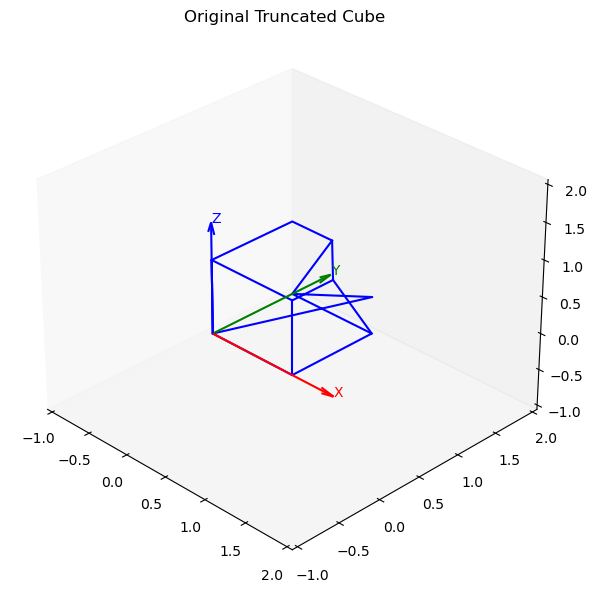

In [6]:
# Vertex coordinates for the truncated cube from the table
vertices_truncated_cube = np.array([
    [0, 0, 1],    # 1
    [1, 0, 1],    # 2
    [1, 0.5, 1],  # 3
    [0.5, 1, 1],  # 4
    [0, 1, 1],    # 5
    [0, 0, 0],    # 6
    [1, 0, 0],    # 7
    [1, 1, 0],  # 8
    [0, 1, 0],  # 9
    [1, 1, 0.5]     # 10
])

# Visualization of the original truncated cube
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Using a modified plot function to visualize the truncated cube
def plot_truncated_cube(vertices, ax, color='blue'):
    edges = [
        [vertices[j] for j in [0, 1, 2, 3, 4, 0, 5, 6, 7, 8, 9, 5]], # bottom and top
        [vertices[j] for j in [2, 7]], # vertical edges
        [vertices[j] for j in [3, 8]],
        [vertices[j] for j in [1, 6]],
        [vertices[j] for j in [0, 5]]
    ]
    for edge in edges:
        edge = np.array(edge)
        ax.plot(edge[:, 0], edge[:, 1], edge[:, 2], color=color)

# Visualization
def plot_axes(ax):
    """Plot the 3D axes for reference."""
    ax.quiver(0, 0, 0, 1.5, 0, 0, color='r', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 1.5, 0, color='g', arrow_length_ratio=0.1)
    ax.quiver(0, 0, 0, 0, 0, 1.5, color='b', arrow_length_ratio=0.1)
    ax.text(1.5, 0, 0, 'X', color='r')
    ax.text(0, 1.5, 0, 'Y', color='g')
    ax.text(0, 0, 1.5, 'Z', color='b')
        
plot_truncated_cube(vertices_truncated_cube, ax)
ax.set_title('Original Truncated Cube')
plot_axes(ax)

ax.view_init(30, -45)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 2])
ax.set_zlim([-1, 2])
ax.grid(False)

plt.tight_layout()
plt.show()


   Four vertices from the truncated cube (`v5`, `v2`, `v3`, `v9`) are extracted, which are crucial for determining the rotation axis.


### Rodrigues' Rotation Formula

To rotate a vector **v** around an axis **k** by an angle \( \theta \), the resulting vector **v_rot** is given by:


\begin{equation}
\mathbf{v_{\text{rot}}} = \mathbf{v} \cos(\theta) + (\mathbf{k} \times \mathbf{v}) \sin(\theta) + \mathbf{k} (\mathbf{k} \cdot \mathbf{v}) (1 - \cos(\theta))
\end{equation}




   **Quaternion Rotation**
   Rotation using quaternions involves several steps:
   - **Quaternion Multiplication**: The product of two quaternions \( q_1 \) and \( q_2 \) results in a new quaternion.
   - **Quaternion Conjugate**: The conjugate of a quaternion \( q \) negates the vector part.
   - **Quaternion Rotation**: A vector \( {**v**} \) is rotated around an axis \( \{**k**} \) by converting it into a quaternion and multiplying it with the rotation quaternion and its conjugate.




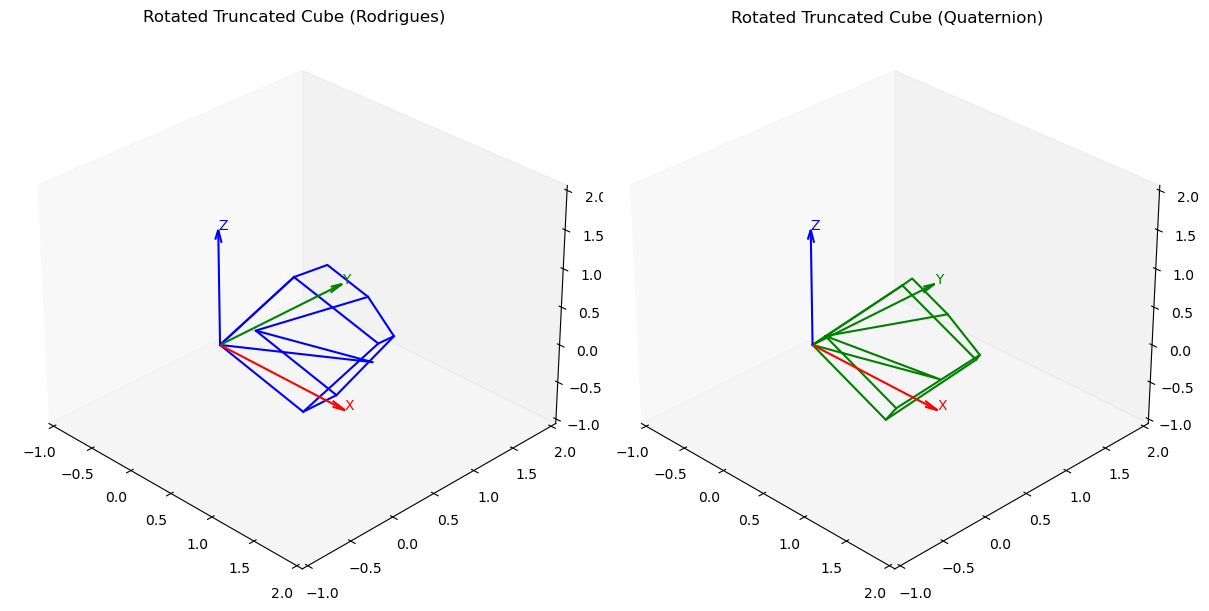

In [7]:


# Extracting coordinates of the required vertices
v5 = vertices_truncated_cube[4]
v2 = vertices_truncated_cube[1]
v3 = vertices_truncated_cube[2]
v9 = vertices_truncated_cube[8]

# Finding the center of the face with vertices 2, 3, and 9
center_face = (v2 + v3 + v9) / 3

# Finding the direction of the rotation axis
rotation_axis = center_face - v5
rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)  # Normalizing the rotation axis

# Rodrigues' rotation
def rodrigues_rotation(v, k, theta):
    """Rotate vector v by angle theta around axis k using Rodrigues' formula."""
    theta_rad = np.deg2rad(theta)
    v_rot = v * np.cos(theta_rad) + np.cross(k, v) * np.sin(theta_rad) + k * np.dot(k, v) * (1 - np.cos(theta_rad))
    return v_rot

# Quaternion rotation
def quaternion_multiply(q1, q2):
    """Multiply two quaternions."""
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1 * w2 - x1 * x2 - y1 * y2 - z1 * z2
    x = w1 * x2 + x1 * w2 + y1 * z2 - z1 * y2
    y = w1 * y2 + y1 * w2 + z1 * x2 - x1 * z2
    z = w1 * z2 + z1 * w2 + x1 * y2 - y1 * x2
    return w, x, y, z

def quaternion_conjugate(q):
    """Return the conjugate of a quaternion."""
    w, x, y, z = q
    return w, -x, -y, -z

def rotate_vector_using_quaternion(v, k, theta):
    """Rotate vector v by angle theta around axis k using quaternions."""
    theta_rad = np.deg2rad(theta) / 2
    q = (np.cos(theta_rad), *(k * np.sin(theta_rad)))
    v_quaternion = (0, *v)
    v_rot_quaternion = quaternion_multiply(quaternion_multiply(q, v_quaternion), quaternion_conjugate(q))
    return np.array(v_rot_quaternion[1:])

# Rotating the vertices of the truncated cube by -45 degrees around the rotation axis
vertices_rotated = np.array([rodrigues_rotation(v, rotation_axis, -45) for v in vertices_truncated_cube])
vertices_rotated_quaternion = np.array([rotate_vector_using_quaternion(v, rotation_axis, -60) for v in vertices_truncated_cube])



def plot_truncated_cube(vertices, ax, color='blue'):
    edges = [
        [vertices[j] for j in [0, 1, 2, 3, 4, 0, 5, 6, 7, 8, 9, 5]], # bottom and top
        [vertices[j] for j in [2, 7]], # vertical edges
        [vertices[j] for j in [3, 8]],
        [vertices[j] for j in [1, 6]],
        [vertices[j] for j in [0, 5]]
    ]
    for edge in edges:
        edge = np.array(edge)
        ax.plot(edge[:, 0], edge[:, 1], edge[:, 2], color=color)

# Visualization of the rotated truncated cube
fig = plt.figure(figsize=(12, 6))

# Using Rodrigues' rotation
ax1 = fig.add_subplot(121, projection='3d')
plot_truncated_cube(vertices_rotated, ax1, color='blue')
plot_axes(ax1)
ax1.set_title('Rotated Truncated Cube (Rodrigues)')
ax1.view_init(30, -45)
ax1.set_xlim([-1, 2])
ax1.set_ylim([-1, 2])
ax1.set_zlim([-1, 2])
ax1.grid(False)

# Using Quaternion rotation
ax2 = fig.add_subplot(122, projection='3d')
plot_truncated_cube(vertices_rotated_quaternion, ax2, color='green')
plot_axes(ax2)
ax2.set_title('Rotated Truncated Cube (Quaternion)')
ax2.view_init(30, -45)
ax2.set_xlim([-1, 2])
ax2.set_ylim([-1, 2])
ax2.set_zlim([-1, 2])
ax2.grid(False)

plt.tight_layout()
plt.show()


## №4

## 3D Rotation of a Truncated Cube in Steps

The code visualizes the rotation of a truncated cube in three primary steps:

1. **Translation (Перенос)**: Move the cube such that the center of one of its faces aligns with the origin.
2. **Rotation (Поворот)**: Rotate the translated cube around a specific axis.
3. **Reverse Translation (Обратный Перенос)**: Move the rotated cube back to its original position.

### Procedure:

- **Determine the Rotation Axis (Определение оси вращения)**:
  The rotation axis is determined by the vector from one of the cube's vertices to the center of the face. This vector is then normalized.

- **Translation**:
  All the vertices of the truncated cube are shifted such that the center of the face is now at the origin.

- **Rotation**:
  Using Rodrigues' rotation formula, each translated vertex of the cube is rotated by -45 degrees around the determined rotation axis.

- **Reverse Translation**:
  The rotated vertices are shifted back, aligning the center of the face to its original position.


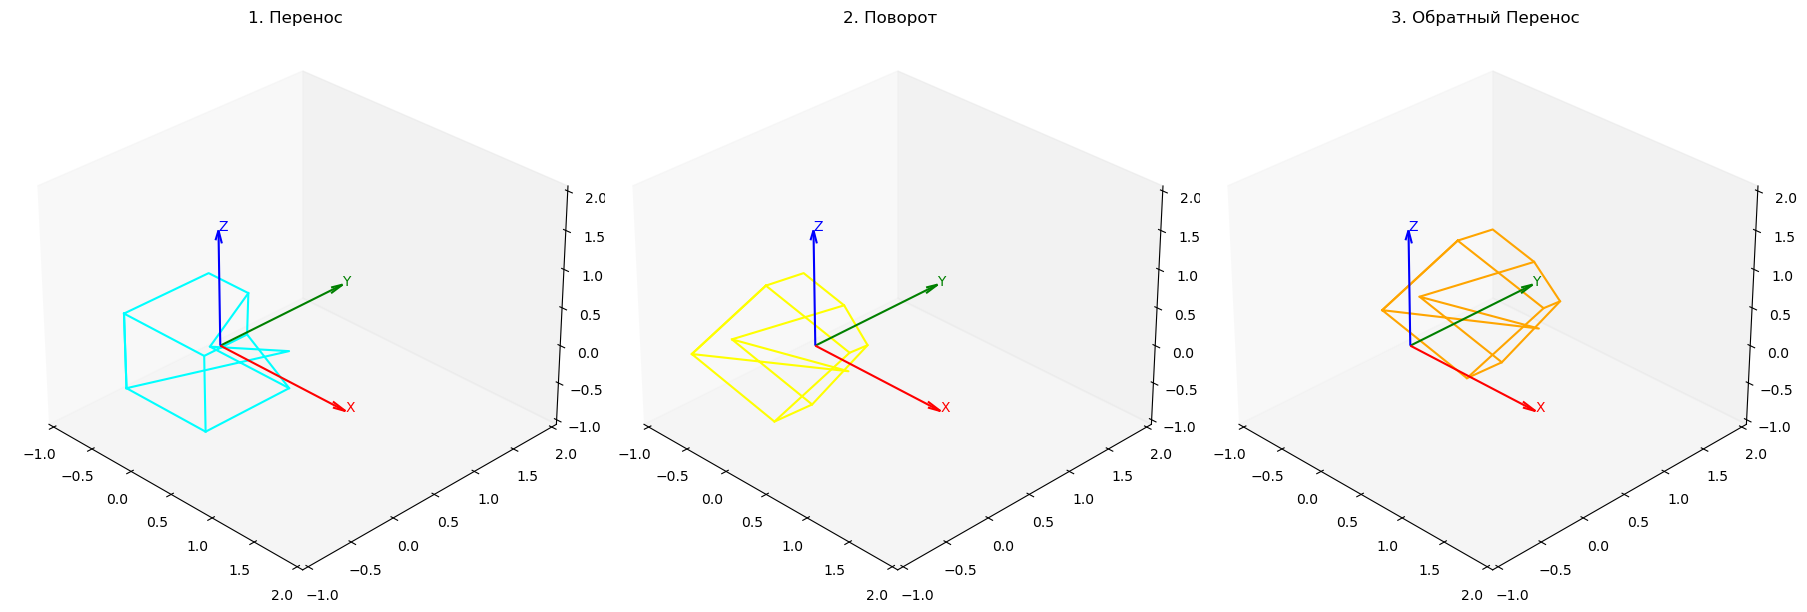

In [8]:
# Определим ось вращения и выполним все необходимые шаги

# Определение оси вращения
rotation_axis_2 = center_face - vertices_truncated_cube[4]
rotation_axis_2 = rotation_axis_2 / np.linalg.norm(rotation_axis_2)  # Нормализация

# 1. Перенос: переместим куб так, чтобы центр грани был в начале координат
translated_vertices_2 = vertices_truncated_cube - center_face

# 2. Поворот: применяем формулу Родрига
rotated_translated_vertices_2 = np.array([rodrigues_rotation(v, rotation_axis_2, -45) for v in translated_vertices_2])

# 3. Обратный перенос
final_rotated_vertices_2 = rotated_translated_vertices_2 + center_face

# Визуализация каждого шага
fig = plt.figure(figsize=(18, 6))

# 1. Перенос
ax1 = fig.add_subplot(131, projection='3d')
plot_truncated_cube(translated_vertices_2, ax1, color='cyan')
plot_axes(ax1)
ax1.set_title('1. Перенос')
ax1.view_init(30, -45)
ax1.set_xlim([-1, 2])
ax1.set_ylim([-1, 2])
ax1.set_zlim([-1, 2])
ax1.grid(False)

# 2. Поворот
ax2 = fig.add_subplot(132, projection='3d')
plot_truncated_cube(rotated_translated_vertices_2, ax2, color='yellow')
plot_axes(ax2)
ax2.set_title('2. Поворот')
ax2.view_init(30, -45)
ax2.set_xlim([-1, 2])
ax2.set_ylim([-1, 2])
ax2.set_zlim([-1, 2])
ax2.grid(False)

# 3. Обратный перенос
ax3 = fig.add_subplot(133, projection='3d')
plot_truncated_cube(final_rotated_vertices_2, ax3, color='orange')
plot_axes(ax3)
ax3.set_title('3. Обратный Перенос')
ax3.view_init(30, -45)
ax3.set_xlim([-1, 2])
ax3.set_ylim([-1, 2])
ax3.set_zlim([-1, 2])
ax3.grid(False)

plt.tight_layout()
plt.show()
